## Making a hypothesis

Wrapping up what we have discussed so far, we can introduce a more familiar - the Hypothesis. 

According to Wikipedia a [Hypothesis](https://en.wikipedia.org/wiki/Hypothesis) is a proposed explination about some phenomenon. A hypothesis is by no means a guess, but should be a reasonable argument that explains why something occurrs. That last definition 'reasonable argument' is probably specious (what is 'reasonable'?), but maybe it will direct us to examine how a scientist might think about a hypothsis. 

In particular, a scientist not only needs to think about reasonable evidence, but needs to express this in a quantitative (yes, qualitative too) manner; hence statistics. A basic statistical approach is to use something called the null hyothesis: **H<sub>0</sub>**.

A null hypothesis is what it sounds like - it is a hypothesis that assumes there is no affect or no difference. For example, rather than ask the question, does *Drug X* work? we simply assume that *Drug X* does not work, and then try to prove that hypothesis. In some ways we can think of this as 'not getting our hopes up.' We try to prove that and effect or phenomenon is not real (also see the [Copernican principle](https://en.wikipedia.org/wiki/Copernican_principle)). 

### Thinking about error

When we evaluate our null hypothesis, we end of making a decision - do we reject or accept the null hypothesis?

#### Example:

**H<sub>0</sub>**: The 10th grade class of Central has an average hight that is identical to the hight of students at all NYC high schools. 


#### Questions:
1.Why is the **H<sub>0</sub>** above a null hypothesis?

2.How would you write the current **H<sub>0</sub>** as a regular hypothesis (not null)?

When we make a jugment/decision about our hypothesis, we can end up either making a correct (true) choice, but we can also make two different type of mistakes. 

##### Type I error
The Type I error (false positive) happens when we decide the **H<sub>0</sub>**  should be rejected when it was actually false. 

##### Type II error
The Type I error (false negative) happens when we decide the **H<sub>0</sub>**  should be acccpted when it was actually true.

![](type-i-and-type-ii-errors.jpg)

### Can you complete the following chart:

In this chart, there are two correct outomes (there is only one type of correct - correct!) but there are many ways to be wrong (Type I or Type II error). Edit the markdown to complete the chart below

|Choice|Assume Null Hypothesis is True|Assume Null Hypothesis is False|
|:----:|:----------------------------:|:-----------------------------:|
|Accept Null Hypothesis|?|?|
|Reject Null Hypothesis|?|?|

Tip: Replace the question marks with either: **'Correct'** or **'Type I Error'** or **'Type II Error'**

## Chi-Squared, A statistical test for catagorial data

Finally, we are ready to think about how to look at M&Ms. To do so we will use a statistical test, which is where all of our previous work was going. The Chi-Squared (χ²) test we will use is calculated as:

χ² = [((number of actual observations) - (number of expected observations))\**2]/(number of expected observations)

For example, let's assume in a classrom of 100 students, we expect to see 50 males and 50 females. How would we calculate the χ² value for a classroom where we saw 51 males and 49 females?

Males:
Observed number (O) = 51
Expected number (E) = 50
- (O - E) = 1
- (O - E)\**2 = 1
- [(O - E)\**2]/E = 0.02

So 0.02 is our χ² value. What does this mean? Nothing yet


We need to know two more things. The first is easy, we need to know how many choices we could have had - in our classroom, how many possible catagories did we choose from. In our case, only two: Male or Female. We take our number of choices (n), and always subtract 1, to give us **'df'**, our 'degrees of freedom'. Now we can take the 0.02 value to the Chi-squared [chart](https://people.richland.edu/james/lecture/m170/tbl-chi.html). According to this chart with df = 1, the 0.002 value lies somewhere between 0.9 and 0.1. These values are (for our purposes today) probabilities (our chances) that we if we reject our null hypothesis we would be correct. For example, if our probability (p) was 0.5 = rejecting the null, would be right half the time. If our probability (p) was 0.05, we would be right 95% of the time. We will talk more about this later, but let's try an example with our M&Ms 

## M&Ms and Chi-Squared

According to published information, here are the probabilities for M&M colors:

|Color|Probability|
|-----|-----------|
|Blue|0.24|
|Brown|0.13|
|Green|0.16|
|Yellow|0.14|
|Red|0.13|
|Orange|0.20|

#### What is our null hypothesis?
Take a guess below? Are the M&Ms you have in your tube the same as any random sample of M&Ms?


Given the above, the complete the following python code by taking your counts of the M&Ms and placing them in code block below:

In [ ]:
#Create a dictionary to hold the observations
observed_mnm = {}

observed_mnm['Brown']   =  2
observed_mnm['Blue']    =  3
observed_mnm['Red']     =  4
observed_mnm['Orange']  =  3
observed_mnm['Yellow']  =  2
observed_mnm['Green']   =  1

In the above code block, we used a new data structure called dictionary. A dictionary works like a list in many ways, except you can call dictionary items by their name, rather than an index number:

In [ ]:
my_favs = {'color':'red',
           'day':'monday',
          'fruit':'bannana'}

print(my_favs['color'])
print(type(my_favs))

To complete our code, we just have to make sure our observation dictionary has all of its values as 'floats' not integers:

In [ ]:
observed_mnm['Brown']   =  float(observed_mnm['Brown'] )
observed_mnm['Blue']    =  float(observed_mnm['Blue'])
observed_mnm['Red']     =  float(observed_mnm['Red'])
observed_mnm['Orange']  =  float(observed_mnm['Orange'])
observed_mnm['Yellow']  =  float(observed_mnm['Yellow'] )
observed_mnm['Green']   =  float(observed_mnm['Green'])

print(observed_mnm)

Now the rest of the code

In [ ]:
#import some special pyton functions
import pandas as pd
import scipy.stats.mstats as mst

#turn the observed_mnm dictionary into a dataframe so we can do math
data = pd.DataFrame.from_dict(observed_mnm, orient ='index')
# add the name 'observed' to the dataframe
data.columns = ['observed']
# sum up the observations
observations = data.observed.sum()

# convert the observations to percentages
#data = data / data.sum()
# add an 'expected' column and fill in with
data['expected'] = ''
data.expected['Blue']   = 0.24  * observations
data.expected['Brown']  = 0.13  * observations
data.expected['Green']  = 0.16  * observations
data.expected['Yellow'] = 0.14  * observations
data.expected['Red']    = 0.13  * observations
data.expected['Orange'] = 0.20  * observations
print(data)
# Use the stats package to do the ChiSquare test
result = mst.chisquare(data.observed,data.expected)
print("Chi-squared statistic is %f" %result[0])
print("p-value is: %f" %result[1])
print("Probability null hypothesis is true: %f%%" %(float(result[1])*100))


if  (float(result[1])*100) > 5:
    print("You should accept the null hypthothesis!")
else:
    print("You should reject the null hypthothesis!")

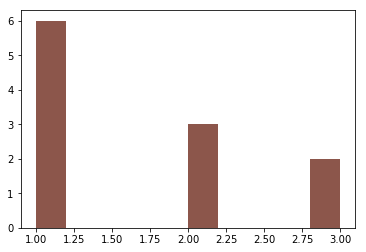

In [10]:
from matplotlib import pyplot as mp

data = 
plot1 = mp.hist(data)
mp.show(plot1)